<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe3-MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema: Sub-arreglo máximo

**Entrada**: Arreglo de tamaño n con valores numéricos $[a_1,a_2,...,a_n]$

**Salida**: Sub-arreglo de la forma: $[a_i,a_{i+1},...,a_j]$, tal que
$\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ para cualquier par $(i',j')$, con $i \leq j \leq n$

Supongamos que somos trabajadores de una empresa, y queremos analizar durante qué periodo se produjo el máximo crecimiento a lo largo de un mes. Para ello, disponemos de un gráfico con los ingresos obtenidos por día durante ese tiempo. ¿Cómo podemos determinar en qué instante se produjo el mayor aumento de ingresos?

Una posible idea, sería calcular la variación de ingresos por día respecto al anterior, para así obtener una tasa de cambio. Luego, lo que queremos es maximizar esta variación para encontrar el periodo de mayor crecimiento. Consideremos que cada uno de estos valores estará guardado en un arreglo, donde cada casilla corresponderá a un día del mes. Para obtener la máxima variación neta, necesitamos encontrar un sub-arreglo de modo que al sumar sus elementos, obtengamos el mayor resultado posible. Es aquí donde cobra importancia el **problema del sub-arreglo máximo**.

Existen múltiples formas de resolver este problema, sin embargo, en este informe nos enfocaremos principalmente en su solución recursiva, puesto que es una de las más eficientes que existen.

Cabe destacar que este problema tiene numerosas aplicaciones, que van desde la Inteligencia Artificial, como por ejemplo, detectar el área con mayor brillo de una imagen, hasta la bioinformática, en el análisis de secuencias de proteínas.




# 2. Descripción del algoritmo

## 2.1 Código

El siguiente código muestra una implementación recursiva para resolver el problema del **sub-arreglo máximo**:

In [2]:
from termcolor import colored

def maxSubArrayMid(A, low, mid, high):
  sum = 0
  left_sum = A[mid]
  max_left = mid

  for i in range(mid,low-1,-1):
    sum += A[i]
    if sum > left_sum:
      left_sum, max_left = sum, i

  sum = 0
  right_sum = A[mid+1]
  max_right = mid+1

  for j in range(mid+1,high+1):
    sum += A[j]
    if sum > right_sum:
      right_sum, max_right = sum, j

  return max_left, max_right, left_sum + right_sum

def maxSubArray(A, low=0, high=None, verbose=False):
  if high == None:
    high = len(A)-1
  
  if low == high: # Arreglo contiene un solo elemento
    return low, high, A[low]

  mid = int((low+high)/2) # Mitad del arreglo

  if verbose == True:
    if (high - low + 1) == len(A):
      print(f"Entrada: {A}\n")

    print("Dividiendo arreglo ", end='')
    print("[" + colored(f"{str(A[low:mid+1])[1:-1]}, ", "red"), end='')
    print(colored(f"{str(A[mid+1:high+1])[1:-1]}", "blue") + "] ", end='')
    print("en la posición mid = " + str(mid) + "\n")

  left_low, left_high, left_sum = maxSubArray(A,low,mid,verbose) # Suma máxima en el sub-arreglo izquierdo
  right_low, right_high, right_sum = maxSubArray(A,mid+1,high,verbose) # Suma máxima en el sub-arreglo derecho
  mid_low, mid_high, mid_sum = maxSubArrayMid(A,low,mid,high)

  if verbose == True:
    print(f"Comparando sub-arreglos: ", end='')
    print(f"Left = {A[left_low:left_high+1]} ({colored(str(left_sum), 'magenta')}) - ", end='')
    print(f"Right = {A[right_low:right_high+1]} ({colored(str(right_sum), 'magenta')}) - ", end='');
    print(f"Mid = {A[mid_low:mid_high+1]} ({colored(str(mid_sum), 'magenta')})");

  if left_sum > right_sum and left_sum > mid_sum:
    if verbose == True: print(f"Sub-arreglo máximo: Left = {A[left_low:left_high+1]}\n")
    return left_low, left_high, left_sum

  if right_sum > left_sum and right_sum > mid_sum:
    if verbose == True: print(f"Sub-arreglo máximo: Right = {A[right_low:right_high+1]}\n")
    return right_low, right_high, right_sum

  if verbose == True: print(f"Sub-arreglo máximo: Mid = {A[mid_low:mid_high+1]}\n")
  return mid_low, mid_high, mid_sum

# Ejemplo
A = [7,-8,4,-2,8,-15]
print("Entrada: ", A)

i, j, sum = maxSubArray(A)
print("Sub-arreglo máximo: ", A[i:j+1])

Entrada:  [7, -8, 4, -2, 8, -15]
Sub-arreglo máximo:  [4, -2, 8]


## 2.2. Descripción del algoritmo

La entrada consiste en un arreglo de tamaño $n$ con números reales. El algoritmo busca y retorna los índices del subarreglo tal que la suma de sus elementos sea la máxima posible. Los pasos realizados por el algoritmo son los siguientes:

1. Se divide el arreglo inicial por la mitad y se busca recursivamente el sub-arreglo que maximice la suma de los elementos de cada mitad.

2. Luego, la función `maxSubArrayMid` busca un sub-arreglo que maximice la suma de elementos cruzados, es decir, considerando un sub-arreglo que contenga elementos continuos de ambas mitades.

3. Se retornan los índices inicial y final del sub-arreglo máximo y la suma de sus elementos.

Los pasos realizados por la función `maxSubArrayMid` son los siguientes:

1. Se busca un sub-arreglo que maximice la suma en la parte izquierda del arreglo, iterando desde $i = mid$ hasta $i = low$. La variable `sum` guardará la suma acumulada de todos los elementos recorridos, la variable `left_sum` guardará la suma máxima, y la variable `max_left` guardará el índice que maximiza la suma.

2. Se repite el mismo paso para la parte derecha del arreglo, iterando desde $j = mid + 1$ hasta $j = high$. La variable `sum` guardará la suma acumulada de todos los elementos recorridos, la variable `right_sum` guardará la suma máxima, y la variable `max_right` guardará el índice que maximiza la suma.

3. Se retornan los índices `max_left` y `max_right`, que corresponden a los índices inicial y final del sub-arreglo máximo que pasa por el punto de división. En tercer lugar se retorna la suma total de sus elementos, que es igual a `left_sum + right_sum`. 



## 2.3. Ejemplo

El siguiente ejemplo muestra una representación gráfica de los pasos realizados por el algoritmo para encontrar el sub-arreglo máximo:

![picture](https://drive.google.com/uc?export=view&id=1UiSxTRfouL54RScGWeBQLPwE359UF2gJ)

Recordemos que el algoritmo **MaxSubArray** compara 3 subarreglos por cada llamada a la función. Por ejemplo, observemos que en el penúltimo nivel del árbol, se comparan los arreglos $A_{left}$, $A_{right}$ y$A_{mid}$ del arreglo inicial, puesto que este nivel representa en realidad la primera llamada a la función.

Observemos que los sub-arreglos $A_{left} = [6,2,7]$, $A_{right} = [5]$ corresponden a los sub-arreglos máximos del arreglo inicial $A = [-4,6,2,7,-8,5,-1]$, donde $A[mid] = A[3] = 7$ y $A[mid+1] = A[4] = -8$. Considerando que $A_{mid}$ debe contener estos dos elementos, podemos obtener intuitivamente el sub-arreglo máximo que pasa por el punto de división, el cual es $A_{mid} = [6,2,7,-8,5]$.

Luego, debemos comparar la suma de cada sub-arreglo obtenido. En este caso, obtenemos los valores $S_{left} = 15$, $S_{right} = 5$ y $S_{mid} = 12$. Como se cumple que $S_{left} > S_{mid} > S_{right}$, el arreglo retornado por la función será $A_{max} = A_{left}$.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso del algoritmo.

In [4]:
import random
A = random.sample(range(-20, 21), 6)
i, j, sum = maxSubArray(A, verbose=True)
print("Salida:", A[i:j+1])

Entrada: [-1, 11, -16, 14, 1, -5]

Dividiendo arreglo [-1, 11, -16, 14, 1, -5] en la posición mid = 2

Dividiendo arreglo [-1, 11, -16] en la posición mid = 1

Dividiendo arreglo [-1, 11] en la posición mid = 0

Comparando sub-arreglos: Left = [-1] (-1) - Right = [11] (11) - Mid = [-1, 11] (10)
Sub-arreglo máximo: Right = [11]

Comparando sub-arreglos: Left = [11] (11) - Right = [-16] (-16) - Mid = [11, -16] (-5)
Sub-arreglo máximo: Left = [11]

Dividiendo arreglo [14, 1, -5] en la posición mid = 4

Dividiendo arreglo [14, 1] en la posición mid = 3

Comparando sub-arreglos: Left = [14] (14) - Right = [1] (1) - Mid = [14, 1] (15)
Sub-arreglo máximo: Mid = [14, 1]

Comparando sub-arreglos: Left = [14, 1] (15) - Right = [-5] (-5) - Mid = [14, 1, -5] (10)
Sub-arreglo máximo: Left = [14, 1]

Comparando sub-arreglos: Left = [11] (11) - Right = [14, 1] (15) - Mid = [11, -16, 14, 1] (10)
Sub-arreglo máximo: Right = [14, 1]

Salida:  [14, 1]


# 3. Correctitud

### **Teorema 1 (Correctitud de la función MaxSubArrayMid).**

*La función **MaxSubArrayMid** retorna el sub-arreglo máximo del arreglo de entrada que contiene las posiciones $mid$ y $mid+1$.*

## Prueba del Teorema

Puesto que la función `maxSubArrayMid` utiliza un bucle distinto para iterar cada mitad del arreglo, demostraremos el teorema utilizando una **propiedad invariante** para cada ciclo.

Para la iteración de la mitad izquierda del arreglo, se cumple la siguiente propiedad:

> Al comienzo de cada iteración $i$, se cumple que `A[max_left...mid]` es el sub-arreglo máximo contenido dentro de `A[mid-i...mid]` y que contiene el elemento `A[mid]`. Además, `left_sum` corresponde a la suma de sus elementos.

Así mismo, para la mitad derecha del arreglo, la propiedad invariante es la siguiente:

> Al comienzo de cada iteración $j$, se cumple que `A[mid+1...max_right]` es el sub-arreglo máximo contenido dentro de `A[mid+1...mid+1+j]` y que contiene el elemento `A[mid+1]`. Además, `right_sum` corresponde a la suma de sus elementos.

Debido a que el procedimiento realizado por cada bucle es distinto, pero ambos utilizan un algoritmo similar, nos enfocaremos en demostrar la propiedad invariante de bucle para la mitad izquierda del arreglo.


**Inicialización**

En la iteración $i = 0$, la variable `max_left` fue previamente inicializada con el valor de `mid`, por lo cual `A[max_left...mid] = A[mid...mid]` es el sub-arreglo máximo contenido dentro de `A[mid-i...mid] = A[mid...mid]`. Esto es trivialmente cierto, ya que el sub-arreglo máximo de un arreglo que contiene un único elemento, será el mismo arreglo. Además, `left_sum` fue inicializada con el valor de `A[mid]`, que es el único valor del arreglo, y por lo tanto, es igual a la suma máxima. 

**Mantención**

Para determinar si la propiedad se mantiene, demostraremos que se cumple para cualquier iteración $i$ aplicando inducción.

Asumamos que la propiedad es correcta para la iteración $i-1$. En la siguiente iteración, la variable `sum` guardará la suma total de los elementos del arreglo `A[mid-i...mid]`. Luego, existen dos posibles casos:

1. La suma total del arreglo es mayor que la suma máxima: `sum > left_sum`. Como se ha encontrado un sub-arreglo cuya suma es mayor, `left_sum` toma el valor de `sum` y `max_left` toma el valor de `mid-i`, puesto que se ha encontrado un nuevo sub-arreglo `A[max_left...mid]` que maximiza la suma. 

2. La suma total del arreglo es menor o igual que la suma máxima: `sum <= left_sum`. En este caso, las variables `left_sum` y `max_left` no se actualizan, manteniendo los valores de la última iteración. Sabemos por la hipótesis inductiva que la propiedad es correcta para la iteración anterior, por lo cual los valores de `left_sum` y `max_left` también son correctos.

**Correctitud**

Finalmente, como la propiedad ambos bucles es verdadera al inicio y se mantiene en cada iteración, podemos decir que al **finalizar el algoritmo**, se generan dos sub-arreglos $A_{left} = [a_{max_{left}},...,a_{mid-1},a_{mid}]$ y $A_{right} = [a_{mid+1},a_{mid+2},...,a_{max_{right}}]$ que corresponden a los sub-arreglos máximos de cada mitad del arreglo. Luego, al combinar ambas secuencias, obtenemos un nuevo arreglo $A_{mid} = [a_{max_{left}},...,a_{max_{right}}]$ que corresponde al sub-arreglo máximo que pasa por el punto de división del arreglo de entrada. $\Box$

### **Teorema 2 (Correctitud del algoritmo MaxSubArray).**

*El algoritmo **MaxSubArray** retorna el sub-arreglo máximo a partir de un arreglo de tamaño $n$.*

## Prueba del Teorema

Demostraremos la correctitud del algoritmo usando inducción. Asumiremos que el algoritmo MaxSubArray es correcto para cualquier arreglo de tamaño $n \geq 1$.

**Caso base**

Para $n = 1$, dado que estamos buscando la suma máxima en un arreglo de un solo elemento, el algoritmo retornará el mismo elemento, dado que cumple trivialmente la propiedad.

**Paso inductivo**

Para $n > 1$, el algoritmo llama a la función `maxSubArray` de manera recursiva para ambas mitades del arreglo, cada una de tamaño $n/2$. Sabemos que, por la hipótesis inductiva, la función retorna correctamente el sub-arreglo máximo de cada mitad. Llamaremos $S_{left}$ y $S_{right}$ a la suma de los sub-arreglos retornados para la mitad izquierda y derecha respectivamente.

Luego, se llama a la función `maxSubArrayMid` para buscar el sub-arreglo máximo que contenga el punto de división. En base a la demostración del Teorema 1, asumiremos que la función encuentra y retorna correctamente el sub-arreglo con la suma máxima de elementos cruzados. Llamaremos $S_{mid}$ a la suma de este sub-arreglo.

En consecuencia, existen 3 posibles casos para el sub-arreglo máximo, cuya suma denotaremos por $S_{max}$:

1. El sub-arreglo máximo se encuentra en la mitad izquierda del arreglo. En este caso, $S_{left} = S_{max}$, dado que si $S_{left} > S_{max}$, estaríamos contradiciendo que $S_{max}$ sea el sub-arreglo máximo. Si $S_{left} < S_{max}$, entonces la función `maxSubArray` sería incorrecta, puesto que sabemos que el $S_{max}$ se encuentra en la parte izquierda del arreglo. Luego, sabemos que $S_{left} = S_{max}$ corresponde al sub-arreglo máximo, por consiguiente se cumple que $S_{left} \geq S_{right}, S_{mid}$, demostrando así la correctitud de este caso.

2. El sub-arreglo máximo se encuentra en la mitad derecha del arreglo. Este caso es simétricamente opuesto al primero, por lo cual se omitirá su explicación.

3. El sub-arreglo máximo pasa por la mitad del arreglo. En este caso, tenemos que $S_{mid} = S_{max}$, dado que si $S_{mid} > S_{max}$, estaríamos contradiciendo la definición de $S_{max}$. En caso contrario, si $S_{mid} < S_{max}$, la función `maxSubArrayMid` sería incorrecta, ya que existe un sub-arreglo mayor al retornado por la función. Luego, sabemos que $S_{mid} = S_{max}$ corresponde al sub-arreglo máximo, por lo tanto se cumple que $S_{mid} \geq S_{left}, S_{right}$. En consecuencia, queda demostrada la correctitud de este caso.

Como en todos los casos el algoritmo `maxSubArray` retorna correctamente el sub-arreglo máximo para un arreglo de tamaño $n$, por inducción tenemos que para $n \geq 1$, seguirá cumpliéndose la correctitud del algoritmo.$\Box$

# 4. Tiempo de ejecución

### **Teorema 3 (Tiempo de ejecución).**

*El algoritmo **MaxSubArray** tiene un **tiempo de ejecución de** $O(n\;log(n))$ en el peor y mejor caso.*

## Prueba del teorema

En primer lugar, demostraremos que el tiempo de ejecución del algoritmo solo depende del tamaño del arreglo, y no del orden de sus elementos, es decir, el peor caso es igual al mejor caso.

Observemos que la función `maxSubArray` divide el arreglo de entrada considerando únicamente los índices `low` y `high`, por lo cual, en ningún caso el orden de los elementos es un factor relevante que influya en la cantidad de llamadas recursivas de la función.

Luego, la función `maxSubArrayMid` busca el sub-arreglo máximo que pasa por el punto de división. Para ello, se recorre el arreglo de entrada desde los índices `mid` hasta `low` y luego desde `mid+1` hasta `high`, guardando en variables auxiliares los índices inicial y final del sub-arreglo máximo encontrado en la iteración $i$ y $j$ respectivamente. Como se puede ver, no es posible determinar cuál es el sub-arreglo máximo sin antes haber recorrido todos los elementos del arreglo, por esta razón, el orden de los elementos del arreglo no influye en el número de iteraciones de la función.

Ahora que se ha demostrado que solo existe un único caso para este algoritmo, nos enfocaremos en demostrar su complejidad temporal.

Denotaremos $T(n)$ como el tiempo de ejecución total del algoritmo. Para el caso base, cuando $n = 1$, obtenemos que $T(n)$ es constante. Sin embargo, para el caso recursivo, cuando $n > 1$, debemos analizar cada operación del algoritmo por partes:

*   El tiempo que tarda el algoritmo en encontrar el máximo sub-arreglo por cada recursión es $2T(n/2)$, debido a que el arreglo inicial se divide en 2 sub-arreglos de tamaño $n/2$.
*   La función `maxSubArrayMid` tiene un tiempo de ejecución lineal $O(n)$.
*   Comparar la suma de cada sub-arreglo encontrado tiene un tiempo de ejecución constante $O(1)$.

A partir de este análisis, podemos formular la siguiente **función de recurrencia** del algoritmo: 

$T(n) =
     \begin{cases}
       \text{$O(1)$} &\quad\text{$n = 1$}\\
       \text{$2T(n/2) + O(n)$} &\quad\text{$n > 1$} \\ 
     \end{cases}
$

Como se puede observar, la recurrencia es la misma que la del algoritmo **MergeSort**. De esta manera, podemos comprobar que la complejidad del algoritmo es $O(n\;log(n))$ utilizando el **método de sustitución** para resolver recurrencias.

En primer lugar, reemplazaremos $T(n)$ por su complejidad aparente, la cual representaremos con el término $dn\;log(n)$. Del mismo modo, usaremos el término $cn$ para sustituir la complejidad $O(n)$. Luego, la función queda expresada de la siguiente manera:

$dn\;log(n) = 2d(\frac{n}{2})\;log(\frac{n}{2}) + cn$

A continuación, debemos demostrar que $O(n\;log(n))$ es una cota superior de la función, por lo cual reescribiremos la igualdad como una inecuación:

$dn\;log(n) \geq 2d(\frac{n}{2})\;log(\frac{n}{2}) + cn$

Para demostrar nuestra hipótesis, debemos encontrar algún valor $d > 0$ de modo que la inecuación se cumpla. Desarrollando, obtenemos lo siguiente:

$d \geq \frac{c}{log(2)}$

Luego, podemos afirmar que existe un valor $d > 0$ tal que $dn\;log(n) \geq T(n)$, por lo que efectivamente $O(n\;log(n))$ es una cota superior para el algoritmo.$\Box$









# 5. Experimentos

## 5.1. Comparación con algoritmo de Kadane

A continuación se muestra una implementación con complejidad lineal para resolver el problema del subarreglo máximo, conocida como **algoritmo de Kadane**:

In [ ]:
def maxSubArrayKadane(A,size):
    global_max = -float("inf") - 1
    current_max = 0
    start = 0
    end = 0
    s = 0
  
    for i in range(0,size):
        current_max += A[i]
  
        if current_max > global_max:
            global_max = current_max
            start = s
            end = i
  
        if current_max < 0:
            current_max = 0
            s = i+1

    return start, end, global_max

A = [3,-2,-8,7,3,-1,4,-5]
print("Entrada: ", A)

i, j, sum = maxSubArrayKadane(A, len(A))
print("Sub-arreglo máximo: ", A[i:j+1])

Entrada:  [3, -2, -8, 7, 3, -1, 4, -5]
Sub-arreglo máximo:  [7, 3, -1, 4]


Para comparar el algoritmo de Kadane con la implementación recursiva explicada en este informe, se elaborará un gráfico para medir el tiempo de ejecución de ambos algoritmos.

La entrada consistirá en un arreglo generado de forma aleatoria, con $n \in [5,500]$ y valores en el rango de -1000 a 1000.

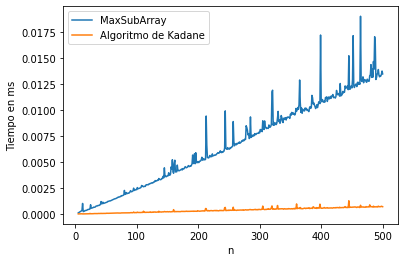

In [ ]:
import matplotlib.pyplot as plt
from timeit import repeat
import random

x=[]; y1=[]; y2=[];

for n in range(5,501):

    A = random.sample(range(-1000, 1001), n)

    # La función repeat ejecuta 20 veces el algoritmo con el arreglo A y retorna el mejor tiempo obtenido.
    t1 = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({A})", repeat=1, number=10)
    t2 = repeat(setup="from __main__ import maxSubArrayKadane", stmt=f"maxSubArrayKadane({A},{len(A)})", repeat=1, number=10)

    x.append(n)
    y1.append(t1)
    y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MaxSubArray", "Algoritmo de Kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

A partir del gráfico, podemos observar que el algoritmo de Kadane es significativamente más eficiente que la implementación recursiva. Esto se debe a la complejidad temporal de cada solución, la cual es $O(n)$ para el algoritmo de Kadane, y $O(n\;log(n))$ para la implementación recursiva. Sabemos que, matemáticamente, la función $f(n) = n\;log(n)$ crece más rápidamente en comparación a la función $g(n) = n$, lo cual se ve reflejado en el gráfico.

## 5.2 Comparación con algoritmo de fuerza bruta.

Es posible resolver el problema del sub-arreglo máximo usando el enfoque de **fuerza bruta**, que consiste en recorrer cada sub-arreglo existente dentro del arreglo de entrada e ir guardando aquel que sea mayor. El siguiente código muestra una implementación para este algoritmo:

In [ ]:
def maxSubArrayFuerzaBruta(A,size):
  global_max = 0
  start = 0
  end = 0

  for i in range(0,size):
    current_sum = 0

    for j in range(i,size):
      current_sum += A[j]

      if current_sum > global_max:
        global_max = current_sum
        start = i
        end = j

  return start, end, global_max

A = [3,-2,-8,7,3,-1,4,-5]
print("Entrada: ", A)

i, j, sum = maxSubArrayFuerzaBruta(A, len(A))
print("Sub-arreglo máximo: ", A[i:j+1])

Entrada:  [3, -2, -8, 7, 3, -1, 4, -5]
Sub-arreglo máximo:  [7, 3, -1, 4]


Para visualizar la diferencia en la eficiencia temporal de ambos algoritmos, se elaborará gráfico similar al anterior, comparando cómo crece el tiempo de ejecución en relación al tamaño del problema.

La entrada consistirá en un arreglo generado de forma aleatoria, con $n \in [5,500]$ y valores en el rango de -1000 a 1000.

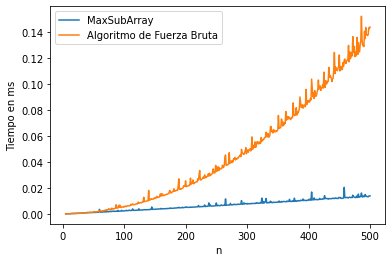

In [ ]:
import matplotlib.pyplot as plt
from timeit import repeat
import random

x=[]; y1=[]; y2=[];

for n in range(5,501):

    A = random.sample(range(-1000, 1001), n)

    # La función repeat ejecuta 20 veces el algoritmo con el arreglo A y retorna el mejor tiempo obtenido.
    t1 = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({A})", repeat=1, number=10)
    t2 = repeat(setup="from __main__ import maxSubArrayFuerzaBruta", stmt=f"maxSubArrayFuerzaBruta({A},{len(A)})", repeat=1, number=10)

    x.append(n)
    y1.append(t1)
    y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MaxSubArray", "Algoritmo de Fuerza Bruta"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como era de esperar, el tiempo de ejecución del algoritmo de fuerza bruta aumenta cuadráticamente en relación al tamaño del problema, debido a que su complejidad temporal es $O(n^2)$. Este algoritmo toma significativamente más tiempo que su versión recursiva, puesto que $n^2 > n\;log(n)$. 

